Title: Normal Distributions
Author: Thomas Breuel
Institution: UniKL

In [31]:

from pylab import *
from math import atan2

# Normal Distributions

Normal distributions have pdfs of the form:

$$ p(x) \propto e^\frac{-x^2}{2} $$

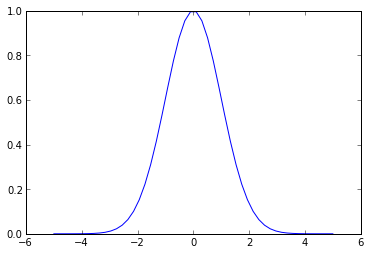

In [2]:
# standard Gaussian
xs = linspace(-5.0,5.0)
plot(xs,exp(-xs**2/2))

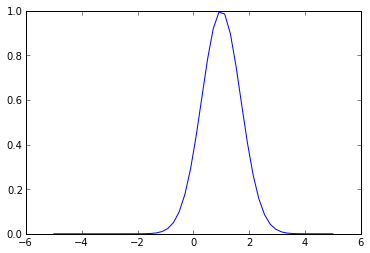

In [3]:
# shifted and scaled Gaussian
xs = linspace(-5.0,5.0)
plot(xs,exp(-(xs-1.0)**2/(2*0.7**2)))

(normalization)

We want $\int f(x) dx = 1$ for the pdf, so the whole Gaussian looks like:

$$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{ -\frac{(x-\mu)^2}{2\sigma^2} } $$

# Important Properties

Important properties of normal distribution:

- all cumulants higher than second order are zero (cumulants are roughly "excess moments", higher order moments you wouldn't predict from lower order moments)
- it's essentially the only (absolutely continuous) distribution for which that is true
- it is the maximum entropy distribution for a given mean and variance
- it is the limit distribution for the sum of large numbers of small random variables
- in problems involving Gaussian error models, the least square solution minimizes the error

# Central Limit Theorem

(central limit theorem)

The sum of a lot of random variables tends towards a Gaussian distribution (under some conditions).

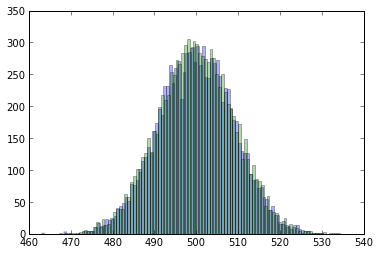

In [4]:
# central limit theorem
samples = [sum(rand(1000)) for i in range(10000)]
_=hist(samples,bins=100,alpha=0.3)
_=hist(randn(10000)*var(samples)**.5+mean(samples),bins=100,alpha=0.3)

# Proof Sketch of CLT

(proof sketch of CLT)

- addition of random variables = convolution of their pdfs
- convolution of pdfs = product of Fourier transforms
- take Fourier transform of pdf $g(x)$, call it $G(t)$ (the *characteristic function*)
- sum of $n$ random variables with pdf $g(x)$ has Fourier transform $G^n(t)$
- take Taylor series and limit

(characteristic function)

The *characteristic function* of a pdf is the inverse Fourier transform of the pdf. Let $X$ be a random variable.

$$\varphi_X(t) = E[e^{itX}]$$

From the Taylor series, you can infer that:

$$\varphi_X(0) = 1$$

$$\varphi'_X(0) = i E[X]$$

$$\varphi''_X(0) = -E[X^2]$$

(proof sketch of CLT)

Assume the mean of the r.v. is zero.

Then, the Taylor series expansion of $G(t)$ becomes:

$$ G(t) = 1 - \frac{1}{2} t^2 + o(t^3) $$



(proof of CLT)

We need to rescale each r.v. by $\frac{1}{\sqrt{n}}$ to keep the second order moment constant, then:

$$ G^n(t) = \left(1 - \frac{t^2}{2n} + o(\frac{t^3}{n^{3/2}})\right)^n $$

Compare with:

$$ e^x = \lim_{n\rightarrow\infty} \left( 1 + \frac{x}{n} \right)^n $$

Hence:

$$ G^n(t) \rightarrow e^{-\frac{t^2}{2}} $$

But you already know that that is the Fourier transform of a Gaussian (you can also try to show it).

# Normal Distributions in Higher Dimensions

(formula and analogy)

In higher dimensions, normal distributions use vectors and quadratic forms instead of scalars, but they look otherwise the same:

$$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{ -\frac{(x-\mu)^2}{2\sigma^2} } $$

$$ p(x) = \frac{1}{(2 \pi)^{k/2} |\Sigma|^{1/2}} e^{ -\frac{(x-\mu)^T\Sigma^{-1}(x-\mu)}2} $$

The division by $\sigma^2$ has been replaced by a multiplication by $\Sigma^{-1}$.

Note that, confusingly, $\Sigma$ is a matrix of variances and covariances, while $\sigma$ is a standard deviation (square root of variance).

(log domain computations and norms)

Because the exponential values become very small, we often work with logarithmic values:

$$\log p(x) = \hbox{const} - \frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) $$

But this is just the distance of the vectors $x$ and $\mu$ in a norm given by $\Sigma^{-1}$:

$$\log p(x) = \hbox{const} - \frac{1}{2} || x - \mu ||^2_{\Sigma^{-1}}$$


# Generating Normal Samples

How do we sample from a normal distribution?

It's pretty easy to get uniformly distributed samples, but we need to transform that to get Gaussian random variables.

You can look up the details here: http://en.wikipedia.org/wiki/Marsaglia_polar_method

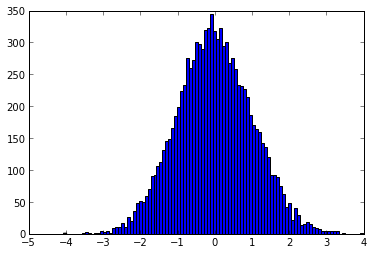

In [5]:
def marsaglia():
    while 1:
        v1 = 2*rand()-1
        v2 = 2*rand()-1
        s = v1**2+v2**2
        if s<1: break
    if s==0.0: return 0.0
    return v1*sqrt(-2*log(s)/s)

example = [marsaglia() for i in range(10000)]
_=hist(example,bins=100)

# Generating Multidimensional Normal Samples

The simplest multidimensional density is one in which each dimension is just a standard normal random variable.



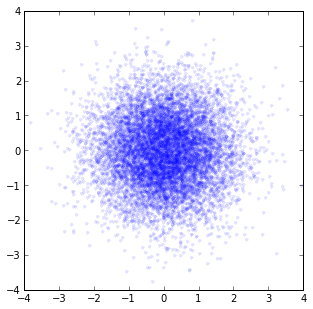

In [40]:
ps = randn(10000,2)
xlim((-4,4))
ylim((-4,4))
figsize(5,5)
plot(ps[:,0],ps[:,1],'.',alpha=0.1)

When the variances differ, we get distributions that are elongated along one dimension or another.



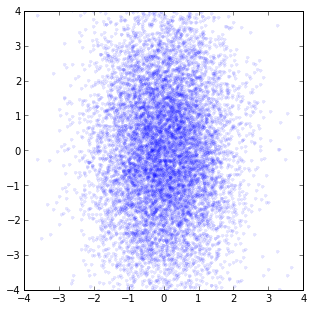

In [41]:
sps = randn(10000,2)
sps[:,1] *= 2.0
xlim((-4,4))
ylim((-4,4))
plot(sps[:,0],sps[:,1],'.',alpha=0.1)
figsize(5,5)

The most general normal density combines rotation and elongation.



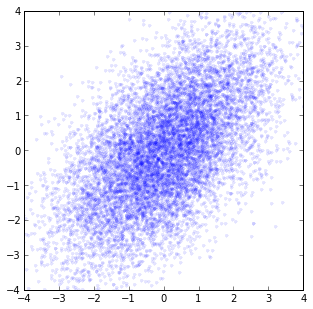

In [42]:
R = array( [[cos(0.7),-sin(0.7)],[sin(0.7),cos(0.7)]] )
rps = dot(sps,R)
xlim((-4,4))
ylim((-4,4))
plot(rps[:,0],rps[:,1],'.',alpha=0.1)
figsize(5,5)

(coordinate transformation)

Let's start with a normal density with arbitrary covariance matrix $\Sigma$:

$$ f(x) \propto \exp(\frac{1}{2}x^T\Sigma^{-1}x) $$

Now let's decompose the $\Sigma^{-1}$ matrix into an orthogonal matrix and the eigenvalues:

$$ \Sigma^{-1} = R^T \Lambda R $$

With that, we can represent the normal density as:

$$ f(x) \propto \exp(\frac{1}{2}(x^T R^T \Lambda^{1/2} ~ \Lambda^{1/2} R x) $$

And that means that our normal density is related to the standard density by a coordinate transformation:

$$ x \rightarrow \Lambda^{1/2} R x $$


(recovering rotation and scale)

Let's try to recover the rotation and scale from these samples. Note that these values are close to the parameters we set above (the `pi+` is needed because the direction of the eigenvector is arbitrary up to reflection).



In [39]:
M = dot(rps.T,rps)/len(rps)
ls,vs = eig(M)
print "eigenvalues",ls
print "angle",pi+atan2(vs[0,1],vs[0,0])

eigenvalues [ 1.02305825  3.9323627 ]
angle 0.705607128771
